In [107]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from  scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


In [133]:
#공격수 선형회귀
fifa_data = pd.read_excel('fifa_data.xlsx')
fifa_data2=fifa_data[fifa_data["VALUE"]>=1]
fifa_data2
fifa_data2=fifa_data2.drop(["NAME","NATION","TEAM"],axis=1)
fw_data1=fifa_data2[fifa_data2["POS"]=="LW"]
fw_data2=fifa_data2[fifa_data2["POS"]=="RW"]
fw_data3=fifa_data2[fifa_data2["POS"]=="FW"]
#[PAC속도 SHO슈팅 DRI드리블 PHY피지컬]+키+나이
FW_data=pd.concat([fw_data1,fw_data2,fw_data3])
FW_data2=FW_data.drop(["RAT","PAS","DEF","IGS"],axis=1)
X=FW_data2.drop(["POS",'VALUE'], axis = 1)
y =FW_data2.VALUE
X_train, X_test, y_train, y_test = train_test_split(X, y ,random_state=15)
lr_model =LinearRegression().fit(X_train, y_train)
y_answer = lr_model.predict(X_test)

lr_model.score(X_train, y_train)

0.5393662155920427

In [109]:
lr=LinearRegression()
lr.fit(X_train,y_train)
y_preds=lr.predict(X_test)
mse= mean_squared_error(y_test,y_preds)
rmse=np.sqrt(mse)
print('MSE : {0:.3f}, RMSE:{1:.3f}'.format(mse,rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test,y_preds)))
print('절편 값:',lr.intercept_)
print('회귀 계수 값:',np.round(lr.coef_,1))

MSE : 485.419, RMSE:22.032
Variance score : 0.618
절편 값: -869.1958984227624
회귀 계수 값: [ 0.1  3.6  5.3  0.6  0.6 -3.4]


In [110]:
coeff= pd.Series(data=np.round(lr.coef_,1),index=X.columns )
coeff.sort_values(ascending=False)

DRI    5.3
SHO    3.6
PHY    0.6
HEI    0.6
PAC    0.1
AGE   -3.4
dtype: float64

In [111]:
mid_data1=fifa_data2[fifa_data2["POS"]=="CAM"]
mid_data2=fifa_data2[fifa_data2["POS"]=="RM"]
mid_data3=fifa_data2[fifa_data2["POS"]=="LM"]
FMID_data=pd.concat([mid_data1,mid_data2,mid_data3])
FMID_data
mid_data4=fifa_data2[fifa_data2["POS"]=="CDM"]
mid_data5=fifa_data2[fifa_data2["POS"]=="CM"]
DMID_data=pd.concat([mid_data4,mid_data5])
DMID_data
GK_data=fifa_data2[fifa_data2["POS"]=="GK"]
GK_data
DEF_data1=fifa_data2[fifa_data2["POS"]=="CB"]
DEF_data2=fifa_data2[fifa_data2["POS"]=="RB"]
DEF_data3=fifa_data2[fifa_data2["POS"]=="LB"]
DEF_data4=fifa_data2[fifa_data2["POS"]=="LWB"]
DEF_data5=fifa_data2[fifa_data2["POS"]=="RWB"]
CDEF_data=pd.concat([DEF_data1,DEF_data2,DEF_data3])
BDEF_data=pd.concat([DEF_data4,DEF_data5])
CDEF_data

,RAT,POS,PAC,SHO,PAS,DRI,DEF,PHY,HEI,IGS,AGE,VALUE
20,95,CB,91,60,80,78,96,92,191,2308,28,70.0
33,94,CB,83,52,73,81,95,96,187,2237,24,75.0
37,93,CB,76,53,75,78,95,93,191,2184,37,1.5
43,93,CB,76,65,86,83,96,89,191,2359,32,12.0
46,93,CB,87,50,84,82,96,90,183,2309,27,75.0
53,92,CB,89,65,82,83,93,91,192,2339,22,40.0
55,92,CB,83,50,80,81,94,90,189,2209,29,50.0
65,92,CB,86,80,92,90,93,89,180,2590,29,55.0
79,91,CB,80,61,77,78,92,95,188,2288,38,1.0
97,90,CB,86,48,78,80,91,93,189,2218,26,40.0


In [131]:
#공격형미드
mid_data1=fifa_data2[fifa_data2["POS"]=="CAM"]
mid_data2=fifa_data2[fifa_data2["POS"]=="RM"]
mid_data3=fifa_data2[fifa_data2["POS"]=="LM"]
FMID_data=pd.concat([mid_data1,mid_data2,mid_data3])
#[PAS패스 SHO슈팅 PAC속도 DRI드리블]
FMID_data.head()
FMID_data2=FMID_data.drop(["RAT","DEF","PHY","IGS"],axis=1)
X=FMID_data2.drop(["POS",'VALUE'], axis = 1)
y =FMID_data2.VALUE
X_train, X_test, y_train, y_test = train_test_split(X, y ,random_state=15)
lr_model =LinearRegression().fit(X_train, y_train)
y_answer = lr_model.predict(X_test)

lr_model.score(X_train, y_train)

0.6236015885330856

In [113]:
lr=LinearRegression()
lr.fit(X_train,y_train)
y_preds=lr.predict(X_test)
mse= mean_squared_error(y_test,y_preds)
rmse=np.sqrt(mse)
print('MSE : {0:.3f}, RMSE:{1:.3f}'.format(mse,rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test,y_preds)))
print('절편 값:',lr.intercept_)
print('회귀 계수 값:',np.round(lr.coef_,1))

MSE : 225.759, RMSE:15.025
Variance score : 0.683
절편 값: -591.915083687603
회귀 계수 값: [ 0.4 -0.3  3.1  3.   0.9 -3.6]


In [114]:
coeff= pd.Series(data=np.round(lr.coef_,1),index=X.columns )
coeff.sort_values(ascending=False)

PAS    3.1
DRI    3.0
HEI    0.9
PAC    0.4
SHO   -0.3
AGE   -3.6
dtype: float64

In [115]:
#수비형미드
mid_data4=fifa_data2[fifa_data2["POS"]=="CDM"]
mid_data5=fifa_data2[fifa_data2["POS"]=="CM"]
DMID_data=pd.concat([mid_data4,mid_data5])
DMID_data.head()
#[PAS패스 DRI드리블 DEF수비 PHY피지컬]
DMID_data2=DMID_data.drop(["RAT","PAC","SHO","IGS"],axis=1)
X=DMID_data2.drop(["POS",'VALUE'], axis = 1)
y =DMID_data2.VALUE
X_train, X_test, y_train, y_test = train_test_split(X, y ,random_state=15)
lr_model =LinearRegression().fit(X_train, y_train)
y_answer = lr_model.predict(X_test)

lr_model.score(X_train, y_train)

0.49469777659716685

In [116]:
lr=LinearRegression()
lr.fit(X_train,y_train)
y_preds=lr.predict(X_test)
mse= mean_squared_error(y_test,y_preds)
rmse=np.sqrt(mse)
print('MSE : {0:.3f}, RMSE:{1:.3f}'.format(mse,rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test,y_preds)))
print('절편 값:',lr.intercept_)
print('회귀 계수 값:',np.round(lr.coef_,1))

MSE : 530.493, RMSE:23.032
Variance score : 0.286
절편 값: -339.4405139916109
회귀 계수 값: [ 5.  -1.8 -1.   2.5  0.3 -3.9]


In [117]:
coeff= pd.Series(data=np.round(lr.coef_,1),index=X.columns )
coeff.sort_values(ascending=False)

PAS    5.0
PHY    2.5
HEI    0.3
DEF   -1.0
DRI   -1.8
AGE   -3.9
dtype: float64

In [118]:
GK_data=fifa_data2[fifa_data2["POS"]=="GK"]
GK_data
#[PAC속도 SHO슈팅 PHY피지컬 PAS패스]
GK_data2=GK_data.drop(["RAT","DRI","DEF","IGS"],axis=1)
X=GK_data2.drop(["POS",'VALUE'], axis = 1)
y =GK_data2.VALUE
X_train, X_test, y_train, y_test = train_test_split(X, y ,random_state=15)
lr_model =LinearRegression().fit(X_train, y_train)
y_answer = lr_model.predict(X_test)

lr_model.score(X_train, y_train)

0.9739037845860677

In [119]:
lr=LinearRegression()
lr.fit(X_train,y_train)
y_preds=lr.predict(X_test)
mse= mean_squared_error(y_test,y_preds)
rmse=np.sqrt(mse)
print('MSE : {0:.3f}, RMSE:{1:.3f}'.format(mse,rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test,y_preds)))
print('절편 값:',lr.intercept_)
print('회귀 계수 값:',np.round(lr.coef_,1))

MSE : 186.930, RMSE:13.672
Variance score : 0.297
절편 값: 246.67261819497222
회귀 계수 값: [-2.5  9.3  0.7 -5.3 -1.2 -5.7]


In [120]:
coeff= pd.Series(data=np.round(lr.coef_,1),index=X.columns )
coeff.sort_values(ascending=False)

SHO    9.3
PAS    0.7
HEI   -1.2
PAC   -2.5
PHY   -5.3
AGE   -5.7
dtype: float64

In [125]:
#수비형 수비
DEF_data1=fifa_data2[fifa_data2["POS"]=="CB"]
DEF_data2=fifa_data2[fifa_data2["POS"]=="RB"]
DEF_data3=fifa_data2[fifa_data2["POS"]=="LB"]
CDEF_data=pd.concat([DEF_data1,DEF_data2,DEF_data3])
CDEF_data.head()
# [PAC속도 DEF수비 PHY피지컬 PAS패스]
CDEF_data2=CDEF_data.drop(["RAT","SHO","DRI","IGS"],axis=1)
X=CDEF_data2.drop(["POS",'VALUE'], axis = 1)
y =CDEF_data2.VALUE
X_train, X_test, y_train, y_test = train_test_split(X, y ,random_state=15)
lr_model =LinearRegression().fit(X_train, y_train)
y_answer = lr_model.predict(X_test)

lr_model.score(X_train, y_train)

0.7450346134166608

In [ ]:
lr_model.score(X_test,y_test)

In [126]:
lr=LinearRegression()
lr.fit(X_train,y_train)
y_preds=lr.predict(X_test)
mse= mean_squared_error(y_test,y_preds)
rmse=np.sqrt(mse)
print('MSE : {0:.3f}, RMSE:{1:.3f}'.format(mse,rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test,y_preds)))
print('절편 값:',lr.intercept_)
print('회귀 계수 값:',np.round(lr.coef_,1))

MSE : 176.321, RMSE:13.279
Variance score : -2.677
절편 값: -242.98056112865032
회귀 계수 값: [ 4.2 -0.6 -0.1  2.4 -0.6 -0.7 -3.3]


In [100]:
coeff= pd.Series(data=np.round(lr.coef_,1),index=X.columns )
coeff.sort_values(ascending=False)

DEF    4.7
PAC    0.3
PAS    0.1
PHY   -0.1
HEI   -0.7
AGE   -2.7
dtype: float64

In [127]:
#풀백
DEF_data4=fifa_data2[fifa_data2["POS"]=="LWB"]
DEF_data5=fifa_data2[fifa_data2["POS"]=="RWB"]
BDEF_data=pd.concat([DEF_data4,DEF_data5])
BDEF_data.head()
#[PAC속도 PAS패스 DRI드리블 DEF수비]
BDEF_data2=CDEF_data.drop(["RAT","SHO","PHY","IGS"],axis=1)
X=BDEF_data2.drop(["POS",'VALUE'], axis = 1)
y =BDEF_data2.VALUE
X_train, X_test, y_train, y_test = train_test_split(X, y ,random_state=15)
lr_model =LinearRegression().fit(X_train, y_train)
y_answer = lr_model.predict(X_test)

lr_model.score(X_train, y_train)

-4.512487508217828

In [124]:
lr=LinearRegression()
lr.fit(X_train,y_train)
y_preds=lr.predict(X_test)
mse= mean_squared_error(y_test,y_preds)
rmse=np.sqrt(mse)
print('MSE : {0:.3f}, RMSE:{1:.3f}'.format(mse,rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test,y_preds)))
print('절편 값:',lr.intercept_)
print('회귀 계수 값:',np.round(lr.coef_,1))

MSE : 264.355, RMSE:16.259
Variance score : -4.512
절편 값: -205.95422900815822
회귀 계수 값: [-0.1 -0.1  0.6  4.6 -0.7 -2.7]


In [103]:
coeff= pd.Series(data=np.round(lr.coef_,1),index=X.columns )
coeff.sort_values(ascending=False)

DEF    4.6
DRI    0.6
PAC   -0.1
PAS   -0.1
HEI   -0.7
AGE   -2.7
dtype: float64

In [104]:
#수비형 수비수 에게 공격수 스탯을 넣엇을 경우
CDEF_data2=CDEF_data.drop(["RAT","DEF","PHY","IGS"],axis=1)
X=CDEF_data2.drop(["POS",'VALUE'], axis = 1)
y =CDEF_data2.VALUE
X_train, X_test, y_train, y_test = train_test_split(X, y ,random_state=15)
lr_model =LinearRegression().fit(X_train, y_train)
y_answer = lr_model.predict(X_test)

lr_model.score(X_train, y_train)

0.3547381584454693

In [57]:
#수비형 수비수에게 공격형 미드스탯을 넣을 경우
CDEF_data2=CDEF_data.drop(["RAT","PAS","DEF","IGS"],axis=1)
X=CDEF_data2.drop(["POS",'VALUE'], axis = 1)
y =CDEF_data2.VALUE
X_train, X_test, y_train, y_test = train_test_split(X, y ,random_state=15)
lr_model =LinearRegression().fit(X_train, y_train)
y_answer = lr_model.predict(X_test)

lr_model.score(X_train, y_train)

0.4077373768468019

In [58]:
#수비형 수비수에게 수비형 미드스탯을 넣을 경우
CDEF_data2=CDEF_data.drop(["RAT","PAC","SHO","IGS"],axis=1)
X=CDEF_data2.drop(["POS",'VALUE'], axis = 1)
y =CDEF_data2.VALUE
X_train, X_test, y_train, y_test = train_test_split(X, y ,random_state=15)
lr_model =LinearRegression().fit(X_train, y_train)
y_answer = lr_model.predict(X_test)

lr_model.score(X_train, y_train)

0.7319910696271804

In [30]:
import matplotlib
import matplotlib.font_manager as fm

In [33]:
game_data=fifa_data2
game_data["POS"].replace('LW','ST',inplace=True)
game_data["POS"].replace('RW','ST',inplace=True)
game_data["POS"].replace('FW','ST',inplace=True)
game_data["POS"].replace('CAM','MID',inplace=True)
game_data["POS"].replace('CDM','MID',inplace=True)
game_data["POS"].replace('CM','MID',inplace=True)
game_data["POS"].replace('RM','MID',inplace=True)
game_data["POS"].replace('LM','MID',inplace=True)
game_data["POS"].replace('CB','DEF',inplace=True)
game_data["POS"].replace('LB','DEF',inplace=True)
game_data["POS"].replace('RB','DEF',inplace=True)
game_data["POS"].replace('CF','DEF',inplace=True)
game_data["POS"].replace('RWB','DEF',inplace=True)
game_data["POS"].replace('LWB','DEF',inplace=True)

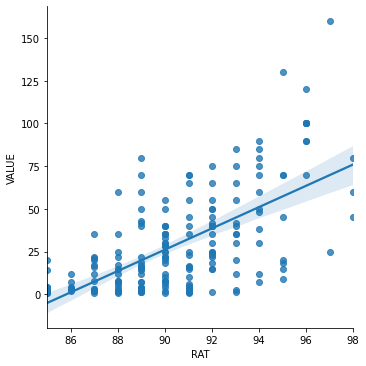

In [34]:
#선형회귀
sns.lmplot(data=game_data,x="RAT",y="VALUE")

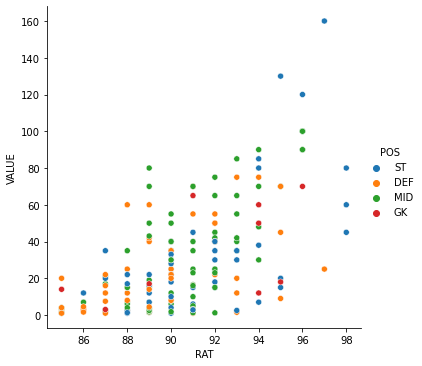

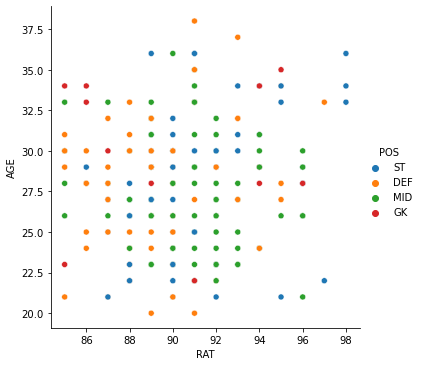

In [35]:
sns.relplot(data=game_data,x="RAT",y="VALUE",hue="POS")
sns.relplot(data=game_data,x="RAT",y="AGE",hue="POS")

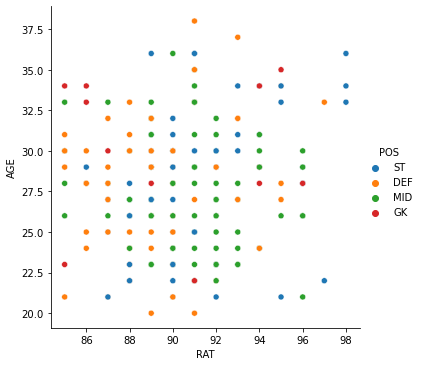

In [36]:
sns.relplot(data=game_data,x="RAT",y="AGE",hue="POS")

In [37]:
game_data[game_data["POS"]=="ST"].sort_values(by=["RAT"],axis=0,ascending=False)
game_data[game_data["POS"]=="DEF"].sort_values(by=["RAT"],axis=0,ascending=False)

,RAT,POS,PAC,SHO,PAS,DRI,DEF,PHY,HEI,IGS,AGE,VALUE
4,97,DEF,90,95,96,97,48,90,185,2491,33,25.0
17,95,DEF,96,93,94,95,42,90,176,2444,27,45.0
20,95,DEF,91,60,80,78,96,92,191,2308,28,70.0
14,95,DEF,96,95,91,95,44,79,169,2416,34,9.0
33,94,DEF,83,52,73,81,95,96,187,2237,24,75.0
43,93,DEF,76,65,86,83,96,89,191,2359,32,12.0
46,93,DEF,87,50,84,82,96,90,183,2309,27,75.0
37,93,DEF,76,53,75,78,95,93,191,2184,37,1.5
35,93,DEF,95,77,90,90,87,84,170,2495,32,20.0
47,92,DEF,99,80,91,93,90,90,184,2524,23,50.0


In [38]:
game_data=fifa_data2
game_data["POS"].replace('LW','ST',inplace=True)
game_data["POS"].replace('RW','ST',inplace=True)
game_data["POS"].replace('FW','ST',inplace=True)
game_data["POS"].replace('CAM','MID',inplace=True)
game_data["POS"].replace('CDM','MID',inplace=True)
game_data["POS"].replace('CM','MID',inplace=True)
game_data["POS"].replace('RM','MID',inplace=True)
game_data["POS"].replace('LM','MID',inplace=True)
game_data["POS"].replace('CB','DEF',inplace=True)
game_data["POS"].replace('LB','DEF',inplace=True)
game_data["POS"].replace('RB','DEF',inplace=True)
game_data["POS"].replace('CF','DEF',inplace=True)
game_data["POS"].replace('RWB','DEF',inplace=True)
game_data["POS"].replace('LWB','DEF',inplace=True)

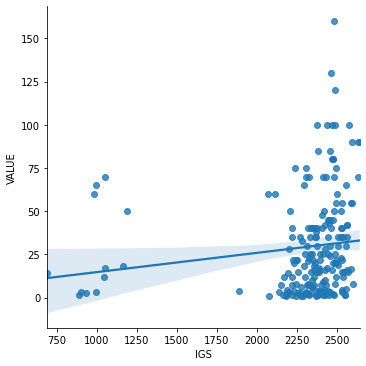

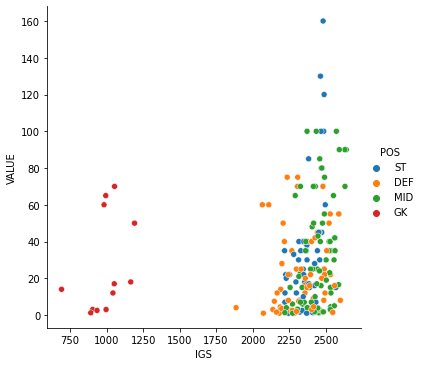

In [39]:
sns.lmplot(data=game_data,x="IGS",y="VALUE")
sns.relplot(data=game_data,x="IGS",y="VALUE",hue="POS")

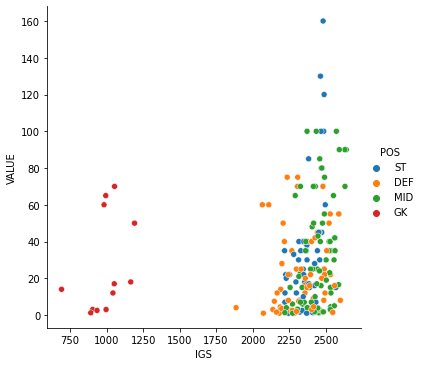

In [40]:
sns.relplot(data=game_data,x="IGS",y="VALUE",hue="POS")

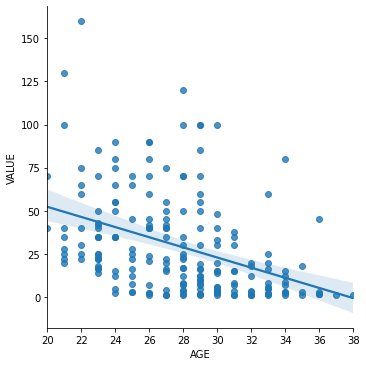

In [41]:
sns.lmplot(data=game_data,x="AGE",y="VALUE")

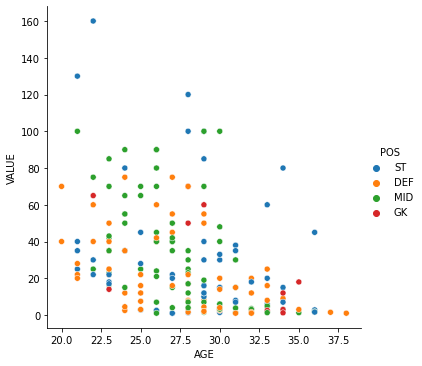

In [42]:
sns.relplot(data=game_data,x="AGE",y="VALUE",hue="POS")

In [43]:
game_data

,RAT,POS,PAC,SHO,PAS,DRI,DEF,PHY,HEI,IGS,AGE,VALUE
0,98,ST,93,97,89,95,51,92,184,2498,33,60.0
1,98,ST,95,99,90,95,43,90,187,2474,36,45.0
2,98,ST,91,99,96,99,43,80,170,2477,34,80.0
3,97,ST,99,94,92,97,50,92,178,2483,22,160.0
4,97,DEF,90,95,96,97,48,90,185,2491,33,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...
199,85,GK,85,84,80,88,50,86,188,891,34,1.2
202,85,MID,91,88,81,87,35,79,177,2221,33,1.3
205,85,DEF,70,33,60,70,85,92,194,1887,30,4.0
208,85,GK,88,80,79,89,35,80,198,691,23,14.0


In [44]:
# RAT 와 AGE 로만 선형회귀돌리기
game_data2=game_data.drop(["POS","DEF","PAC","SHO","PAS","DRI","PHY","HEI","IGS"],axis=1)
X=game_data2.drop(['VALUE'], axis = 1)
y=game_data2.VALUE
X_train, X_test, y_train, y_test = train_test_split(X, y ,random_state=15)
lr_model =LinearRegression().fit(X_train, y_train)
y_answer = lr_model.predict(X_test)

lr_model.score(X_train, y_train)


0.6223040247906455